# Set up and run a simple real-time calibration pipeline, RCAL.

In [1]:
%matplotlib inline

import os
import sys
import multiprocessing

sys.path.append(os.path.join('..', '..'))

from matplotlib import pylab

pylab.rcParams['figure.figsize'] = (8.0, 8.0)
pylab.rcParams['image.cmap'] = 'rainbow'

import matplotlib.pyplot as plt

import numpy

from arl.fourier_transforms.ftprocessor import *
from arl.pipelines.functions import RCAL
from arl.skymodel.operations import create_skycomponent
from arl.util.run_unittests import run_unittests
from arl.util.testing_support import create_named_configuration, create_test_image, create_blockvisibility_iterator

Define the data to be generated

In [2]:
lowcore = create_named_configuration('LOWBD2-CORE')
times = numpy.linspace(-3.0, +3.0, 7) * numpy.pi / 12.0
frequency = numpy.linspace(1.0e8, 1.50e8, 3)

# Define the component and give it some polarisation and spectral behaviour
f = numpy.array([100.0, 20.0, -10.0, 1.0])
flux = numpy.array([f, 0.8 * f, 0.6 * f])

phasecentre = SkyCoord(ra=+15.0 * u.deg, dec=-35.0 * u.deg, frame='icrs', equinox=2000.0)
compdirection = SkyCoord(ra=17.0 * u.deg, dec=-36.5 * u.deg, frame='icrs', equinox=2000.0)
comp = create_skycomponent(flux=flux, frequency=frequency, direction=compdirection)


In [3]:
def plotgain(gt, title=''):
    plt.clf()
    plt.plot(numpy.real(gt.gain).flat, numpy.imag(gt.gain).flat, '.')
    plt.title(title)
    plt.show()
    

To do the simulation, we define a python generator that mimics an ingest. This generator creates, fills in visibilities, and applies gain errors. The generator only makes the data as needed. Hence the RCAL pipeline calls the generator repeatedly until all data have been constructed. 

To consume the data from the ingest, we define another generator, RCAL, that performs calibration and returns a gaintable.

RCAL is itself a python generator so nothing happens until the pipeline is iterated.

The simulation includes amplitude and phase errors of 0.01 and 0.1 radians. The plot shows the recovered gains.

Starting pipeline


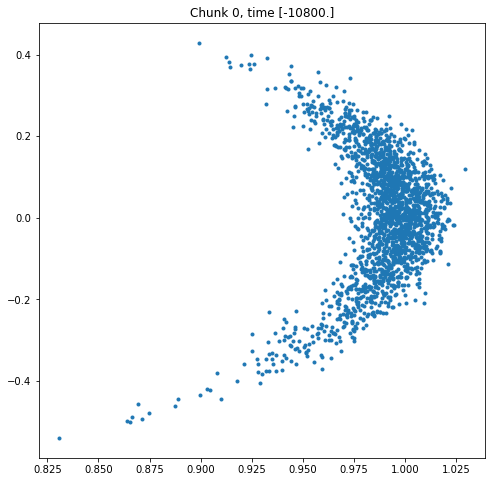

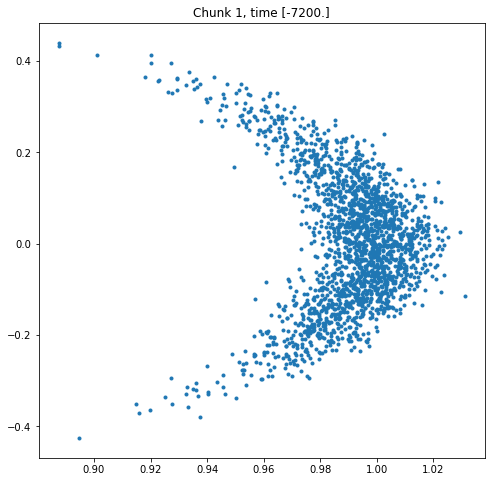

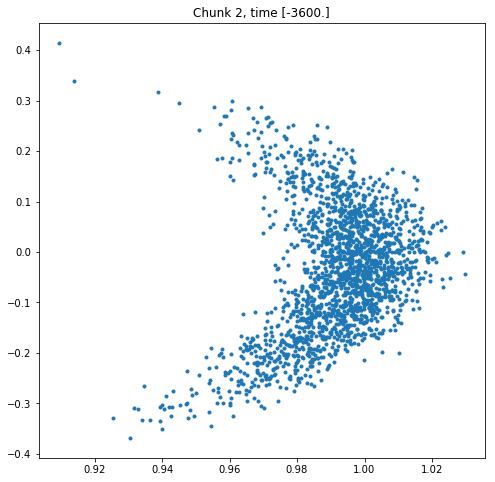

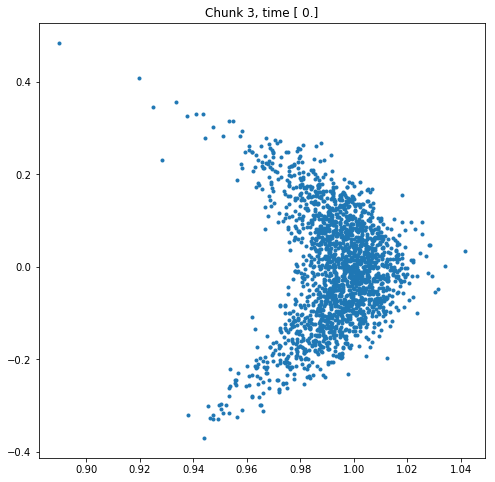

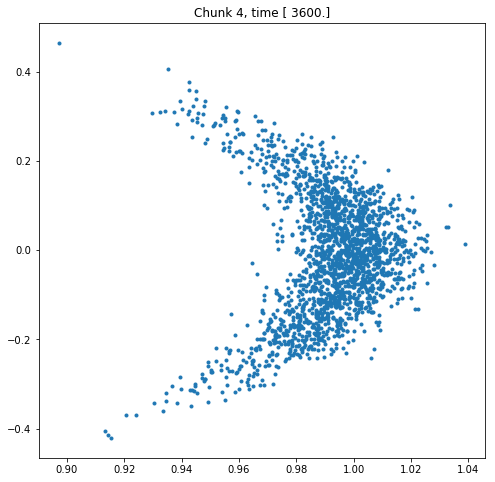

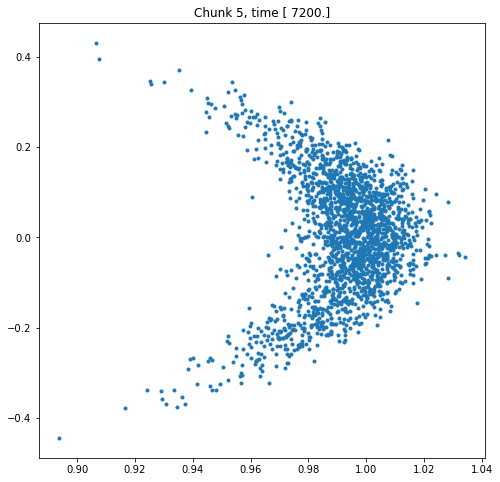

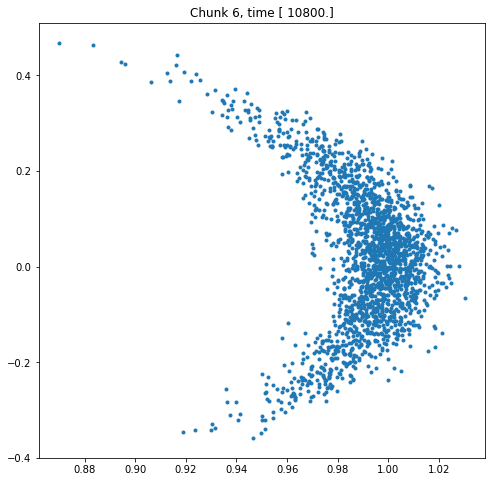

Ingest and RCAL pipelines are empty, stopping


In [4]:
ingest = create_blockvisibility_iterator(lowcore, times=times, freq=frequency, phasecentre=phasecentre, 
                                         weight=1, pol_frame=Polarisation_Frame('stokesIQUV'), 
                                         integration_time=1.0, number_integrations=1, channel_bandwidth=1e6, 
                                         components=comp, phase_error=0.1, amplitude_error=0.01)

rcal_pipeline = RCAL(vis=ingest, components=comp)

print("Starting pipeline")
for igt, gt in enumerate(rcal_pipeline):
    plotgain(gt, title="Chunk %d, time %s" % (igt, numpy.unique(gt.time)))
    
print("Ingest and RCAL pipelines are empty, stopping")